# **AP155 Lab Assignment**
## Module 6: Random Process and Monte Carlo Methods

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Danac, Nathan Gabriel C.\
_Student No._: 2021-12517\
_Section_: THU-HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1

**The Ising model**

_Refer to Exercise 10.9 in the Newman text._ The Ising model is a theoretical model of a magnet. The magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_i s_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_i s_j$, where $J$ is a positive interaction constant. The minus sign ensures that the in- teractions are ferromagnetic, meaning the energy is lower when dipoles are lined up. A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$
where the notation $\langle ij \rangle$ indicates a sum over pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts, except for the spins at the edges of the lattice, which have either two or three neighbors.

Perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 x 20 spins. You will need to set up variables to hold the value ±1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.

1. Write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions $s_i s_j$ from all of them, then multiply by $-J$. Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term $-Js_1s_2$ if spins 1 and 2 are adjacent to one another, but you do not also need a term $-Js_2s_1$. Hint 2: To make your final program to run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python's ability to do arithmetic with entire arrays at once. If you do the calculation step by step, your program will be significantly slower. *(25 pts.)*

2. Now use your function as the basis for a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1. Initially set the spin variables randomly to ±1, so that on average about a half of them are up and a half down, giving a total magneti- zation of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula, Eq. (10.60). If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spip. Now repeat this process for many moves. *(25 pts.)*

3. Make a plot of the total magnetization $M = \sum_i s_i$ of the system as a function of time for a million Monte Carlo steps. You should see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization. Hint: While you are working on your program, do shorter runs, of maybe ten thousand steps at a time. Once you have it working properly, do a longer run of a million steps to get the final results. *(25 pts.)*

4. Run your program several times and observe the sign of the magnetization that develops, positive or negative. Describe what you find and give a brief explana- tion of what is happening. *(25 pts.)*

To beign, we import all the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

# Ising model

First, we need to define the size $N$ of our square lattice and the distribution of spins $p$.

The function `gen_lattice` generates a `NumPy` array using `np.random.choice`, where spin-up and spin-down states are represented by $1$ and $-1$, respectively.

We use this function to generate an $N\times N$ lattice, with spin distribution $p$. In this case, we have a $20\times 20$ lattice, and $p=0.5$ means there is an approximately equal distribution of spin up and spin down states.

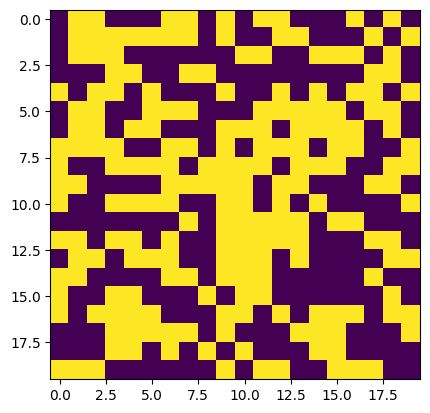

In [49]:
N = 20 #Dimensions of the square lattice
p = 0.5 #Probability of spin-up state

def gen_lattice(dimension, init):
  return np.random.choice([1, -1], size=(dimension, dimension), p=[init, (1 - init)])

start = gen_lattice(N, p)
plt.imshow(start) #Display our lattice

Next, we need to write functions to measure the total energy and magnetization of our lattice.

Again, the energy of the Ising model is described by $$E = -J\sum_{\langle ij \rangle}s_is_j$$

In other words, each interaction between adjacent spins produces energy. Since $s_{ij} = \pm 1$,
$$E_{ij} = s_is_j = \begin{cases}1&\text{for aligned spins}\\ -1&\text{for unaligned spins}\end{cases}$$
We can find the total energy by adding the energy from each spin interaction, and multiplying it by the constant $J$.
$$E = -J\sum_{\langle ij \rangle}E_{ij}$$
Since $J = -1$,
$$E = -\sum_{\langle ij \rangle}E_{ij} = -\sum_{\langle ij \rangle}s_is_j$$

The magnetization is simply the sum of all spins,
$$M = \sum_is_i$$
Hence, for our chosen lattice with an approximately equal distribution of spin-up and spin-down states, we expect a magnetization close to zero.

In [50]:
def find_energy(lattice):
  ud = lattice[:-1, :] * lattice[1:, :] #Find the energy for each interaction between vertically adjacent spins
  lr = lattice[:, :-1] * lattice[:, 1:] #Find the energy for each interaction between horizontally adjacent spins

  return -(np.sum(ud) + np.sum(lr)) #Take the sum of all energies, and multiply by J = -1

def find_magnetization(lattice):
  return lattice.sum() #Take the sum of all spins

print("Initially, the lattice has an energy of " + str(find_energy(start)) + " J, and a magnetization of " + str(find_magnetization(start)))

Initially, the lattice has an energy of -12 J, and a magnetization of 6


We were able to find the energy and magnetization of our lattice. As expected, the magnetization is close to zero.

# Markov chain Monte Carlo simulation

Next, we need to write a function to simulate the evolution of the Ising model.

The function `mcmc` takes two inputs:

*   `lat0` is the initial lattice
*   `iter` is the number of Monte Carlo time steps to take

For each time step, it proposes a spin flip. The probability for accepting the spin flip is given by the Boltzmann probability,
$$\begin{equation*}P = \begin{cases}1&\text{if  }E_j\leq E_i\\ e^{-\beta(E_j - E_i)}&\text{if }E_j>E_i\end{cases}\end{equation*}$$
To simplify our model, we take $\beta = 1$ to simplify the equation,
$$\begin{equation*}P = \begin{cases}1&\text{if  }E_j\leq E_i\\ e^{(E_i - E_j)}&\text{if }E_j>E_i\end{cases}\end{equation*}$$
If the spin flip is rejected, the current iteration of the lattice remains.

At each time step, the corresponding energy and magnetization of the lattice is recorded in separate arrays. After the simulation, the function displays the initial and final states of the lattice and returns:

*   `l` is the array representing the final state of the lattice
*   `e` is the array containing the energy of the lattice at each time step
*   `m` is the array containing the magnetization of the lattice at each time step

In [38]:
def mcmc(lat0, iter):
  e = np.zeros(iter) #Initialize an array containing the energy of the lattice at each time step
  m = np.zeros(iter) #Initialize an array containing the magnetization of the lattice at each time step
  l = lat0 #Initialize a variable to represent the current state of the lattice

  e[0] = find_energy(lat0) #Initial energy of the lattice
  m[0] = find_magnetization(lat0) #Initial magnetization of the lattice

  for i in range(1, iter): #Take (iter) time steps to evolve the lattice
    lat = l.copy() #Copy our lattice
    #Select random coordinates
    x = np.random.randint(0, N - 1)
    y = np.random.randint(0, N - 1)

    lat[x][y] = -l[x][y] #Propose a spin flip at the chosen coordinates
    #Find the energies of the new and previous lattices
    ej = find_energy(lat)
    ei = e[i - 1] #Since we have an array of all energies so far, we can just reference the previous index rather than compute for the energy again

    if ej <= ei or np.random.random() < np.exp(ei - ej): #Accept the spin flip based on the Boltzmann probability
      l = lat #Update the state of our lattice
      #Include its current energy and magnetization in our arrays
      e[i] = ej
      m[i] = find_magnetization(lat)
    else: #Otherwise, reject the spin flip
      #The energy and magnetization remain unchanged, hence, the same as those of the previous iteration
      e[i] = e[i - 1]
      m[i] = m[i - 1]

  fig, [ax1, ax2] = plt.subplots(1, 2)
  ax1.imshow(lat0) #Display the initial lattice
  ax2.imshow(l) #Display the final lattice
  #Formatting
  fig.tight_layout()
  fig.suptitle("Metropolis Monte Carlo simulation for the Ising model")
  fig.subplots_adjust(top=1.14)
  ax1.set_title("$t = 0$")
  ax2.set_title("$t = $" + str(iter))
  return l, e, m

Running our simulation for 1 million time steps,

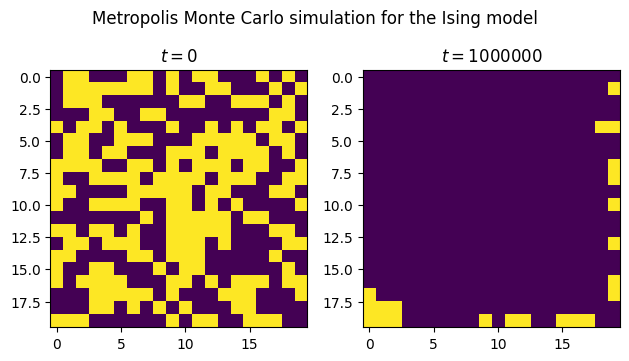

In [51]:
t = int(1e6)

l, e, m = mcmc(start, t)

The initial lattice (L) has an almost equal amount of spin-up and spin-down states, while the final lattice (R) is composed of almost entirely spin-down states.

Based on our Boltzmann probability with $\beta = 1$,
$$\begin{equation*}P = \begin{cases}1&\text{if  }E_j\leq E_i\\ e^{(E_i - E_j)}&\text{if }E_j>E_i\end{cases}\end{equation*}$$

Our Monte Carlo simulation favors lower energy states. Returning to our equation for the energy of the lattice,
$$E = -J\sum_{\langle ij \rangle}E_{ij}$$
where
$$E_{ij} = s_is_j = \begin{cases}1&\text{for aligned spins}\\ -1&\text{for unaligned spins}\end{cases}$$

The energy of the lattice decreases as more and more spins become aligned. Physically, we can describe our model as ferromagnetic.

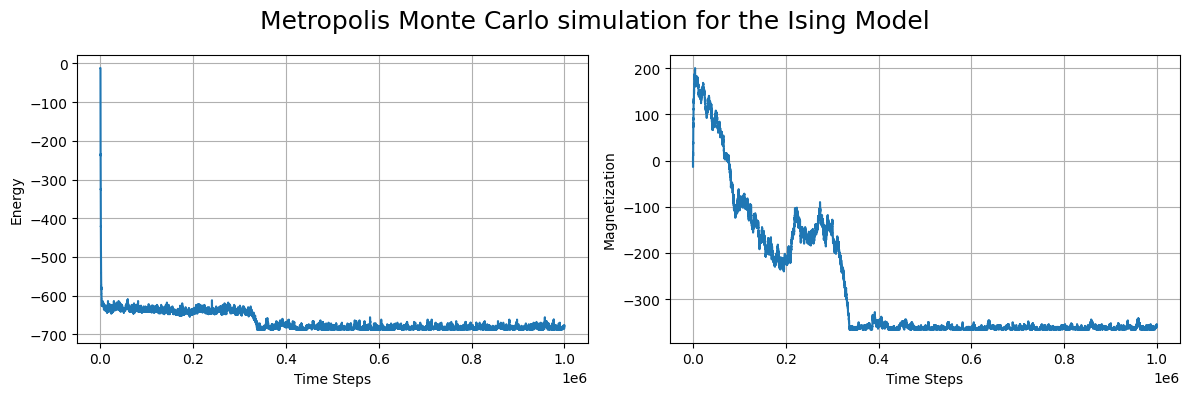

In [52]:
fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize=(12, 4))
ax1.plot(e)
ax2.plot(m)
fig.suptitle(r'Metropolis Monte Carlo simulation for the Ising Model', size=18)
fig.subplots_adjust(top=1.14)
ax1.set_xlabel('Time Steps')
ax1.set_ylabel(r'Energy')
ax1.grid()
ax2.set_xlabel('Time Steps')
ax2.set_ylabel(r'Magnetization')
ax2.grid()
fig.tight_layout()
plt.show()

Given the initial configuration of our lattice, the energy and magnetization both start near zero. As we take more and more steps in the model, it experiences a sharp decrease.

Between (t = 0) and (t = 4e5), the energy appears to be stuck at around $-620\ J$, before suddenly declining to around $-700\ J$, where it remains until the end of the simulation.

For the magnetization, it starts near zero. Between (t = 0) and (t = 4e5), the magnetization fluctuates up and down, even reaching a peak of around $+200$. Since the energy remains almost the same in this time frame despite the fluctuations in magnetization, we can imagine that there are distinct regions forming in the lattice. Both the spin-up and spin-down regions each consist of aligned spins, producing low energy states. As the magnetization decreased over the given time frame, we can observe that the spin-down region slowly engulfed the spin-up region.

Before ($t = 4e5$), the magnetization experiences a sharp decrease from around $-100$ to around $-350$. This sudden drop represents one spin becoming dominant within the lattice.

Another way to interpret magnetization is as the average spin of our lattice,
$$\bar{s} = \frac{M}{N^2} = \frac{(-350)}{400} = -0.875$$

From this time onwards, the almost 90% of spins within the lattice are in a spin-down state.

# Further simulations

We can try running the simulation again for a lattice containing a skewed distribution of spin-up and spin-down states.

First, let's see what happens to a lattice consisting of 75% negative spins

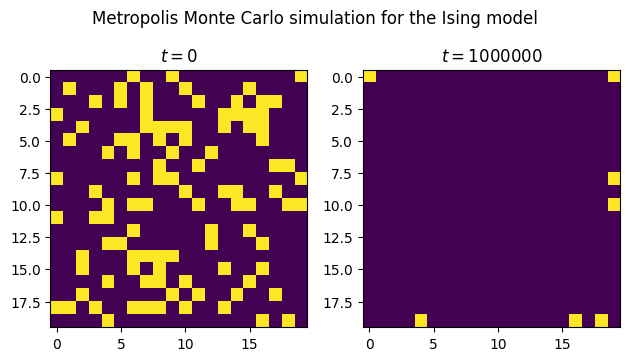

In [55]:
lat2 = gen_lattice(N, 0.25)
l2, e2, m2 = mcmc(lat2, t)

The initial lattice clearly has more spin-down than spin-up states. The final lattice looks just like that from our previous case, albeit with even less spin-up states.

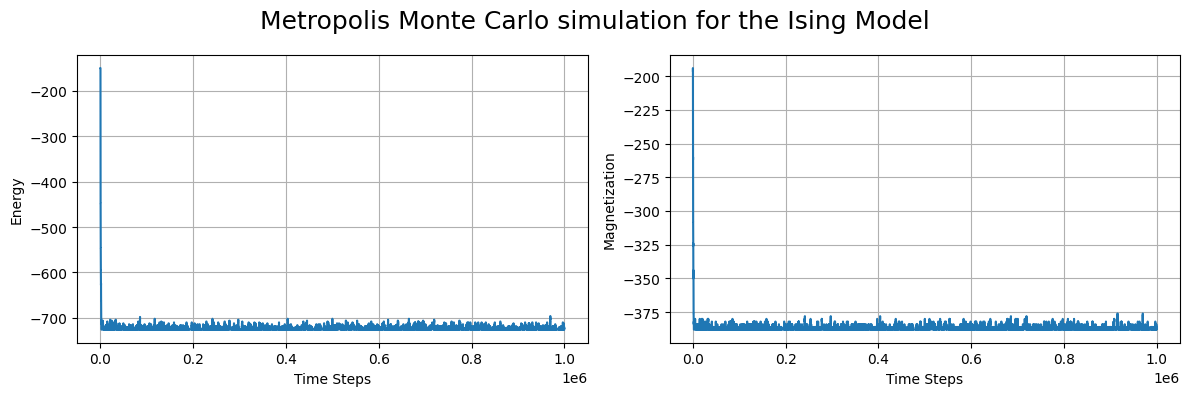

In [56]:
fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize=(12, 4))
ax1.plot(e2)
ax2.plot(m2)
fig.suptitle(r'Metropolis Monte Carlo simulation for the Ising Model', size=18)
fig.subplots_adjust(top=1.14)
ax1.set_xlabel('Time Steps')
ax1.set_ylabel(r'Energy')
ax1.grid()
ax2.set_xlabel('Time Steps')
ax2.set_ylabel(r'Magnetization')
ax2.grid()
fig.tight_layout()
plt.show()

Both the initial energy and magnetization are already negative. Almost instantly, the magnetization reaches a region of around $-380$. Hence, the lattice is almost entirely filled with negative spins. The energy follows much of the same trend, it drops to the lowest energy state and stays there for the entirety of the simulation.

Next, let's try a lattice that has a slight bias towards spin-up states ($p = 0.6$)

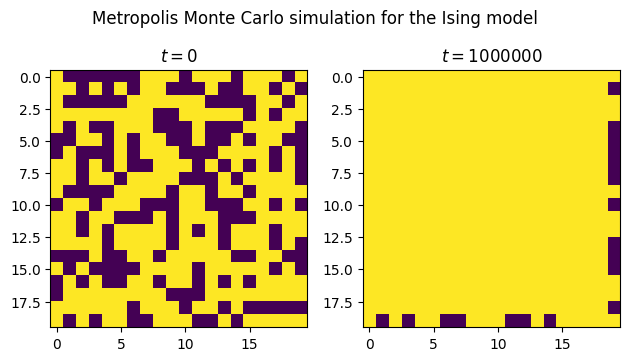

In [64]:
lat3 = gen_lattice(N, 0.6)
l3, e3, m3 = mcmc(lat3, t)

In contrast to our previous models, the final lattice consists of almost entirely spin-up than spin-down states.

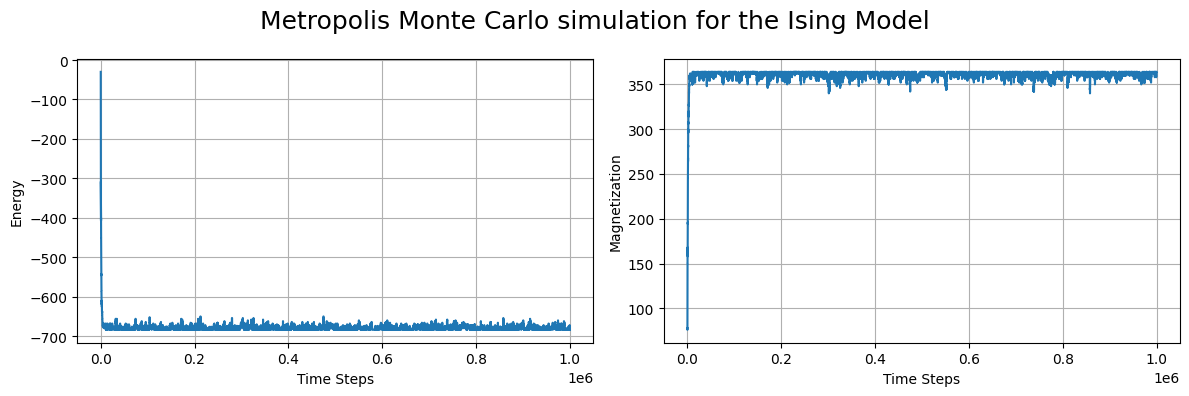

In [65]:
fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize=(12, 4))
ax1.plot(e3)
ax2.plot(m3)
fig.suptitle(r'Metropolis Monte Carlo simulation for the Ising Model', size=18)
fig.subplots_adjust(top=1.14)
ax1.set_xlabel('Time Steps')
ax1.set_ylabel(r'Energy')
ax1.grid()
ax2.set_xlabel('Time Steps')
ax2.set_ylabel(r'Magnetization')
ax2.grid()
fig.tight_layout()
plt.show()

The magnetization instead experiences a sharp increase, leading to a lattice consisting of almost entirely spin-up states.

Again, lower energy states are still favorable. Since the spins are still aligned (although spin-up rather than spin-down), we still expect the energy to decrease. We can observe a sharp decline towards the lowest energy state, where the lattice remains until the end of the simulation.



# Appendix

I tried to use a generator function to simulate the evolution of the Ising model instead. However, it appears to take longer. I suspect this is due to having to compute for the energy of the previous lattice, rather than simply indexing it. In hindsight, this is easily solvable with optimization.

Nonetheless, I don't think there are significant downsides to avoiding the use of a generator function, since both approaches record only the energy and magnetization at each time step, which in theory should consume a similar amount of memory.

In [ ]:
def ising(lat0):
  yield lat0

  while True:
    x = np.random.randint(0, N - 1)
    y = np.random.randint(0, N - 1)

    lat = lat0.copy()
    lat[x][y] = -lat0[x][y]

    e0 = find_energy(lat0)
    e1 = find_energy(lat)

    if (e0 >= e1 or np.random.random() < np.exp(e0 - e1)):
      lat0 = lat

    yield lat0

In [ ]:
def mmcm(lat0, iter):
  data = ising(lat0)

  e = np.zeros(iter)
  m = np.zeros(iter)

  e[0] = find_energy(lat0)
  m[0] = find_magnetization(lat0)
  l = lat0

  for i in range(1, iter):
    l = next(data)
    e[i] = find_energy(l)
    m[i] = find_magnetization(l)

  return l, e, m